In [2]:
import matplotlib.pyplot as plt
import cv2
import PIL
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, Flatten
from keras.preprocessing.text import text_to_word_sequence
from keras.datasets import imdb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
data=pd.read_csv('driving_log.csv', names=['center','left','right','steering',
                                          'throttle','break','speed'])
data.head()


,center,left,right,steering,throttle,break,speed
0,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,0.0,0.0,0.0,0.000007
1,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,0.0,0.0,0.0,0.000008
2,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,0.0,0.0,0.0,0.000009
3,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,0.0,0.0,0.0,0.000011
4,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,C:\Users\fried\OneDrive\Desktop\Masters\Spring...,0.0,0.0,0.0,0.000013


In [19]:
copied=data.copy()

In [20]:
ColumnsOfInterest=["center", "left", "right"]
for column in ColumnsOfInterest:
    copied[column]=copied[column].apply(lambda x: cv2.imread(x))
copied.head()

,center,left,right,steering,throttle,break,speed
0,"[[[185, 145, 116], [185, 145, 116], [184, 144,...","[[[185, 145, 116], [185, 145, 116], [184, 144,...","[[[185, 145, 116], [185, 145, 116], [184, 144,...",0.0,0.0,0.0,0.000007
1,"[[[185, 145, 116], [185, 145, 116], [184, 144,...","[[[185, 145, 116], [185, 145, 116], [184, 144,...","[[[185, 145, 116], [185, 145, 116], [184, 144,...",0.0,0.0,0.0,0.000008
2,"[[[185, 145, 116], [185, 145, 116], [184, 144,...","[[[185, 145, 116], [185, 145, 116], [184, 144,...","[[[185, 145, 116], [185, 145, 116], [184, 144,...",0.0,0.0,0.0,0.000009
3,"[[[185, 145, 116], [185, 145, 116], [184, 144,...","[[[185, 145, 116], [185, 145, 116], [184, 144,...","[[[185, 145, 116], [185, 145, 116], [184, 144,...",0.0,0.0,0.0,0.000011
4,"[[[185, 145, 116], [185, 145, 116], [184, 144,...","[[[185, 145, 116], [185, 145, 116], [184, 144,...","[[[185, 145, 116], [185, 145, 116], [184, 144,...",0.0,0.0,0.0,0.000013


In [37]:
X_train, X_test, y_train, y_test = train_test_split(copied[['center','left','right']], data.steering, test_size=0.2)

In [36]:
X_train.center.iloc[0].shape

(160, 320, 3)

(160, 320, 3)


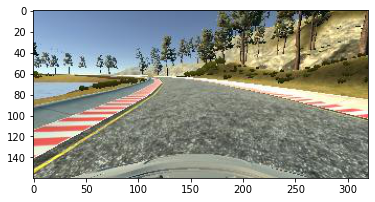

In [38]:
image=X_train.iloc[0].center
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)

In [ ]:
x=Input(shape=(160,320,3))